In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
 - 观察输入矩阵形式
 - 绘图观察图像形状

X Shape:(1000, 1); d Shape:(1000, 1)


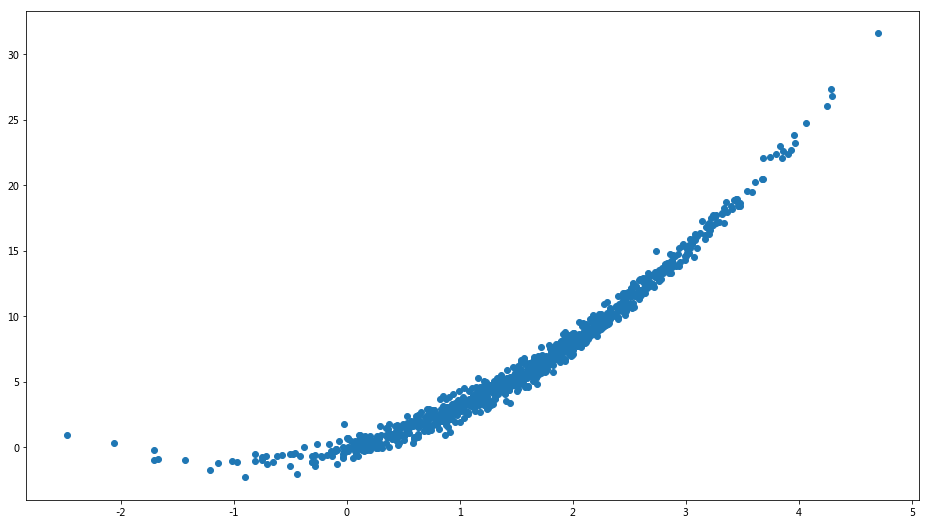

In [2]:
# 读取数据
file = np.load("homework.npz")
X = file['X']
d = file['d']
# 观察输入矩阵形式
print("X Shape:{}; d Shape:{}".format(np.shape(X), np.shape(d)))
# 绘图
plt.figure(figsize=(16,9))
plt.scatter(X, d)

# 创建模型
 ## $y = ax +b$

In [3]:
# 定义函数，x为输入，w为可训练参数
def f(x, w):
    a, b = w
    return a * x + b
# 定义函数关于可训练参数的偏导数
def grad_f(x, d, w):
    a, b = w
    y = f(x, w)
    grad_a = 2 * (y - d) * x
    grad_b = 2 * (y - d)
    return grad_a, grad_b

### 第一种迭代方式
>一次输出一个样本：计算单个可训练参数的梯度，并进行迭代

In [262]:
# 定义初始值
w = [0, 0]
eta = 0.1
for itr in range(100):
    idx = np.random.randint(0, len(X))
    inx = X[idx]
    ind = d[idx]
    ga, gb = grad_f(inx, ind, w)
    w[0] -= eta * ga
    w[1] -= eta * gb

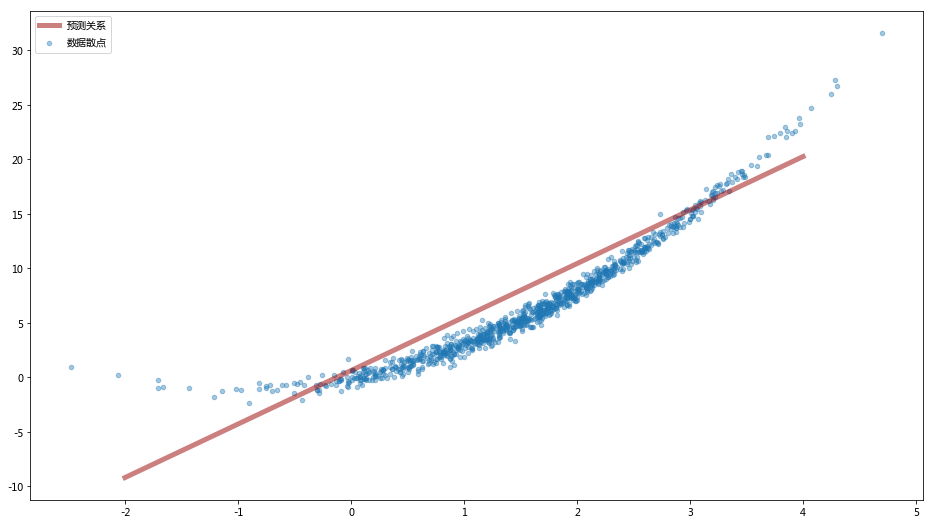

In [263]:
# 输入x
x = np.linspace(-2, 4, 100)
# 输出y
y = f(x, w)
# 绘图
plt.figure(figsize=(16,9))
plt.scatter(X, d, s=20, alpha=0.4, label="数据散点")
plt.plot(x, y, lw=5, color="#990000", alpha=0.5, label="预测关系")
plt.legend()
plt.show()

### 第二种迭代方式
>一次输入多个样本：计算多个可训练参数的梯度取平均，并进行迭代

In [260]:
# 定义初始值
w = [0, 0]
eta = 0.1
batchsize=10
for itr in range(100):
    sum_ga, sum_gb = 0, 0
    for _ in range(batchsize):
        idx = np.random.randint(0, len(X))
        inx = X[idx]
        ind = d[idx]
        ga, gb = grad_f(inx, ind, w)
        sum_ga += ga
        sum_ga += gb
    sum_ga = sum_ga / batchsize
    sum_gb = sum_gb / batchsize
    w[0] -= eta * sum_ga
    w[1] -= eta * sum_gb

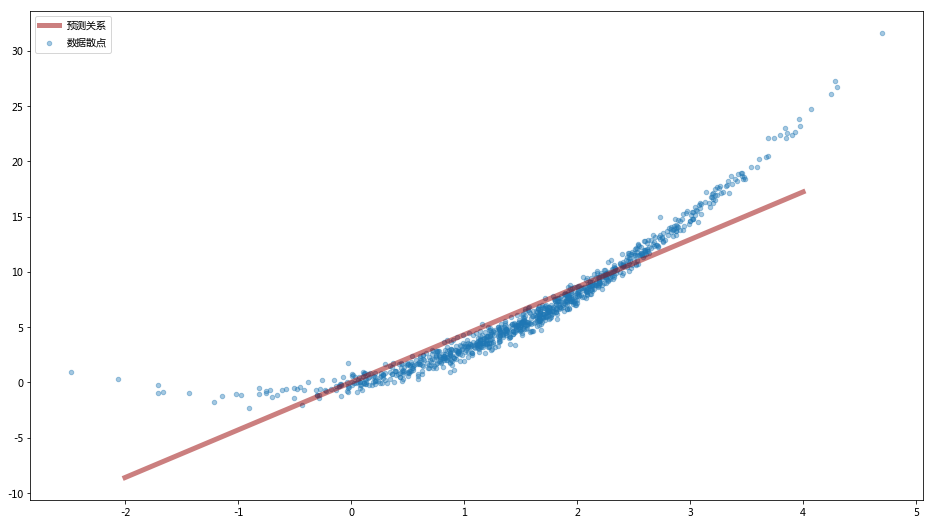

In [261]:
# 输入x
x = np.linspace(-2, 4, 100)
# 输出y
y = f(x, w)
# 绘图
plt.figure(figsize=[16,9])
plt.scatter(X, d, s=20, alpha=0.4, label="数据散点")
plt.plot(x, y, lw=5, color="#990000", alpha=0.5, label="预测关系")
plt.legend()
plt.show()

- 分析
 - 用直线拟合该散点数据并不是最优解，拟合效果不好
 - 对比两种迭代方式可以看到，在学习都为0.1，迭代次数都为100次时，第二种的拟合效果更好一些

 ## $y = ax^2 +bx +c$

In [147]:
def f_2(x, w):
    a, b, c = w
    return a*x**2 + b*x + c

def grad_f_2(x, d, w):
    y = f_2(x, w)
    grad_y = 2 * (y - d)
    grad_a = grad_y * x **2 
    grad_b = grad_y * x
    grad_c = grad_y
    return grad_a, grad_b, grad_c

### 第一种迭代方式
>一次输出一个样本：计算单个可训练参数的梯度，并进行迭代

In [427]:
# 初始参数w
w = [0,0,0]
# 学习率
eta = 0.01
for itr in range(600):
    idx = np.random.randint(0, len(X))
    inx = X[idx]
    ind = d[idx]
    ga, gb, gc= grad_f_2(inx, ind, w)
    w[0] -= eta * ga
    w[1] -= eta * gb
    w[2] -= eta * gc

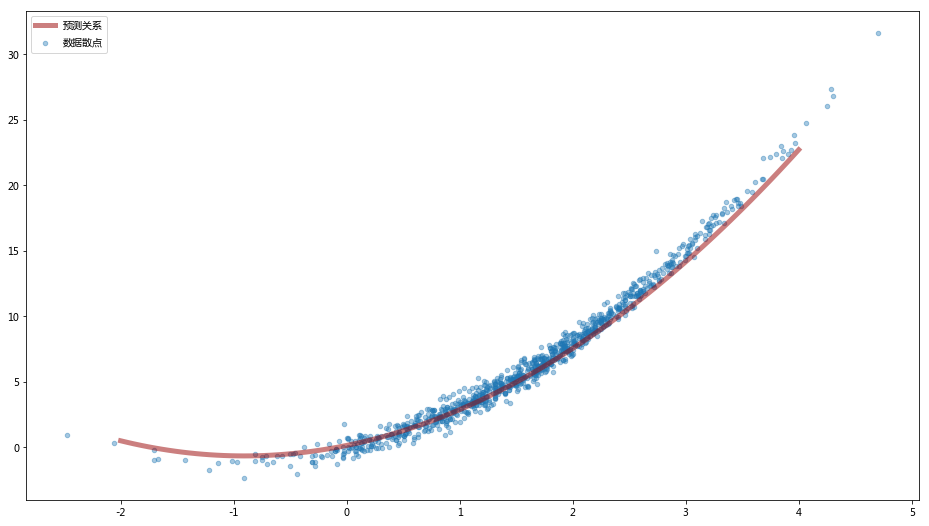

In [428]:
# 输入x
x = np.linspace(-2, 4, 100)
# 输出y
y = f_2(x, w)
# 绘图
plt.figure(figsize=[16,9])
plt.scatter(X, d, s=20, alpha=0.4, label="数据散点")
plt.plot(x, y, lw=5, color="#990000", alpha=0.5, label="预测关系")
plt.legend()
plt.show()

### 第二种迭代方式
>一次输入多个样本：计算多个可训练参数的梯度取平均，并进行迭代

In [452]:
# 初始参数w
w = [0,0,0]
# 学习率
eta = 0.01
batchsize=10
for itr in range(400): 
    sum_ga, sum_gb, sum_gc = 0, 0, 0 
    for _ in range(batchsize): 
        idx = np.random.randint(0,len(X)) 
        inx = X[idx] 
        ind = d[idx] 
        ga, gb,gc= grad_f_2(inx, ind, w) 
        sum_ga += ga 
        sum_gb += gb 
        sum_gc += gc 
    sum_ga = sum_ga / batchsize 
    sum_gb = sum_gb / batchsize 
    sum_gc = sum_gc / batchsize 
    w[0] -= eta * sum_ga
    w[1] -= eta * sum_gb 
    w[2] -= eta * sum_gc

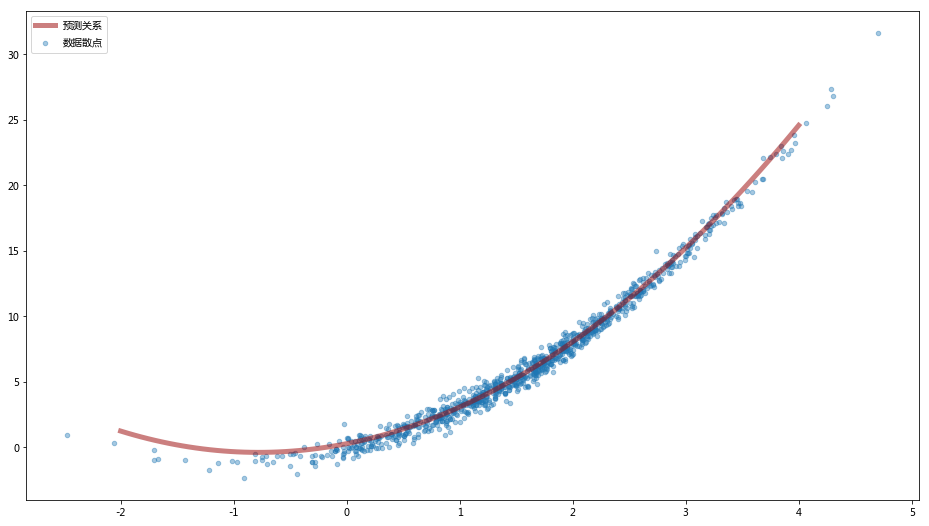

In [453]:
# 输入x
x = np.linspace(-2, 4, 100)
# 输出y
y = f_2(x, w)
# 绘图
plt.figure(figsize=[16,9])
plt.scatter(X, d, s=20, alpha=0.4, label="数据散点")
plt.plot(x, y, lw=5, color="#990000", alpha=0.5, label="预测关系")
plt.legend()
plt.show()

### 第三种迭代方式
>每次输入所有样本，并进行迭代

In [423]:
# 初始参数w
w = [0,0,0]
# 学习率
eta = 0.01
for itr in range(600):
    ga, gb, gc= grad_f_2(X, d, w)
    w[0] -= eta * np.mean(ga)
    w[1] -= eta * np.mean(gb)
    w[2] -= eta * np.mean(gc)

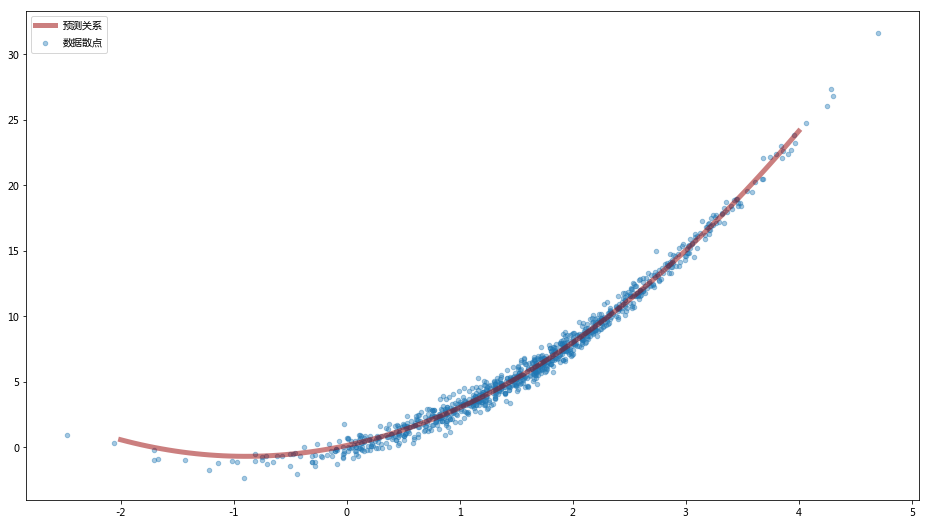

In [424]:
# 输入x
x = np.linspace(-2, 4, 100)
# 输出y
y = f_2(x, w)
# 绘图
plt.figure(figsize=[16,9])
plt.scatter(X, d, s=20, alpha=0.4, label="数据散点")
plt.plot(x, y, lw=5, color="#990000", alpha=0.5, label="预测关系")
plt.legend()
plt.show()

分析：
 - 使用二次函数拟合效果比较优秀
 - 使用第二种迭代方式，运算时间最短

## 加入非线性函数
>使得曲线变得更加复杂，在2.1 $y = ax +b$的基础上，加入非线性函数:
$y=f(ax+b)$
那么此时与前面的代码相比实际上添加了一个：
$$
\begin{matrix}
\frac{\partial loss}{\partial a}=2(y-d)f'(ax+b)x\\
\frac{\partial loss}{\partial b}=2(y-d)f'(ax+b)
\end{matrix}
$$

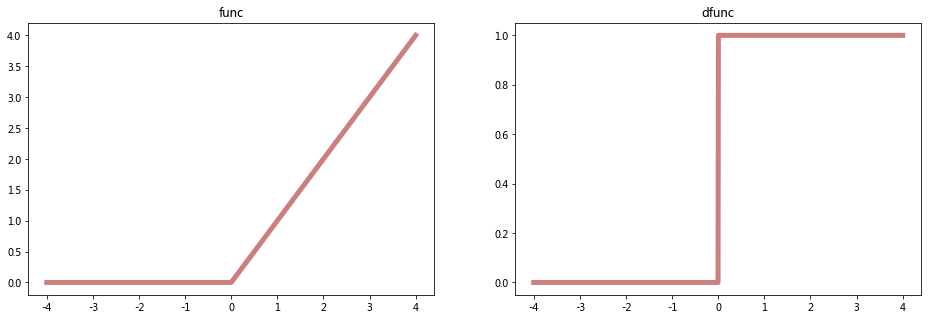

In [3]:
def func(x):
    ret = np.array(x)
    ret[x<0] = 0
    return ret
def dfunc(x):
    ret = np.zeros_like(x)
    ret[x>0] = 1
    return ret
x = np.linspace(-4, 4, 1000)
y1 = func(x)
y2 = dfunc(x)
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.plot(x, y1, lw=5, color="#990000", alpha=0.5)
plt.title('func')
plt.subplot(122)
plt.plot(x, y2, lw=5, color="#990000", alpha=0.5)
plt.title('dfunc')
plt.show()

In [4]:
def f_3(x, w):
    a, b = w
    return func(a * x + b)
# 定义函数关于可训练参数的偏导数
def grad_f_3(x, d, w):
    a, b = w
    y = f_3(x, w)
    dy = dfunc(a * x + b)
    grad_a = 2 * (y - d) * dy * x
    grad_b = 2 * (y - d) * dy
    return grad_a, grad_b

### 第一种迭代方式
>一次输出一个样本：计算单个可训练参数的梯度，并进行迭代

In [33]:
# 定义初始值
w = [1, 1]
eta = 0.01
for itr in range(500):
    idx = np.random.randint(0, len(X))
    inx = X[idx]
    ind = d[idx]
    ga, gb = grad_f_3(inx, ind, w)
    w[0] -= eta * ga
    w[1] -= eta * gb

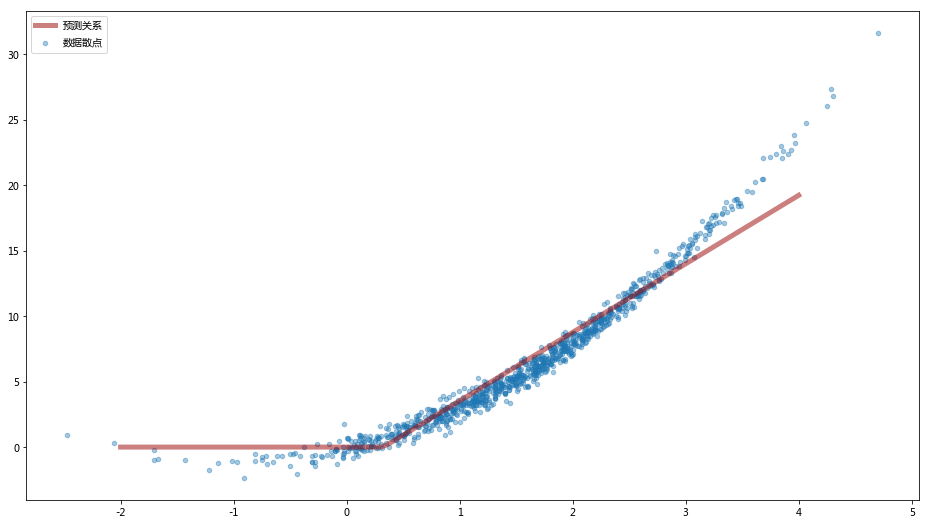

In [34]:
# 输入x
x = np.linspace(-2, 4, 100)
# 输出y
y = f_3(x, w)
# 绘图
plt.figure(figsize=(16,9))
plt.scatter(X, d, s=20, alpha=0.4, label="数据散点")
plt.plot(x, y, lw=5, color="#990000", alpha=0.5, label="预测关系")
plt.legend()
plt.show()

### 第二种迭代方式
>一次输入多个样本：计算多个可训练参数的梯度取平均，并进行迭代

In [39]:
# 定义初始值
w = [0.5, 0.5]
eta = 0.01
batchsize=32
for itr in range(250):
    sum_ga, sum_gb = 0, 0
    for _ in range(batchsize):
        idx = np.random.randint(0, len(X))
        inx = X[idx]
        ind = d[idx]
        ga, gb = grad_f_3(inx, ind, w)
        sum_ga += ga
        sum_ga += gb
    sum_ga = sum_ga / batchsize
    sum_gb = sum_gb / batchsize
    w[0] -= eta * sum_ga
    w[1] -= eta * sum_gb

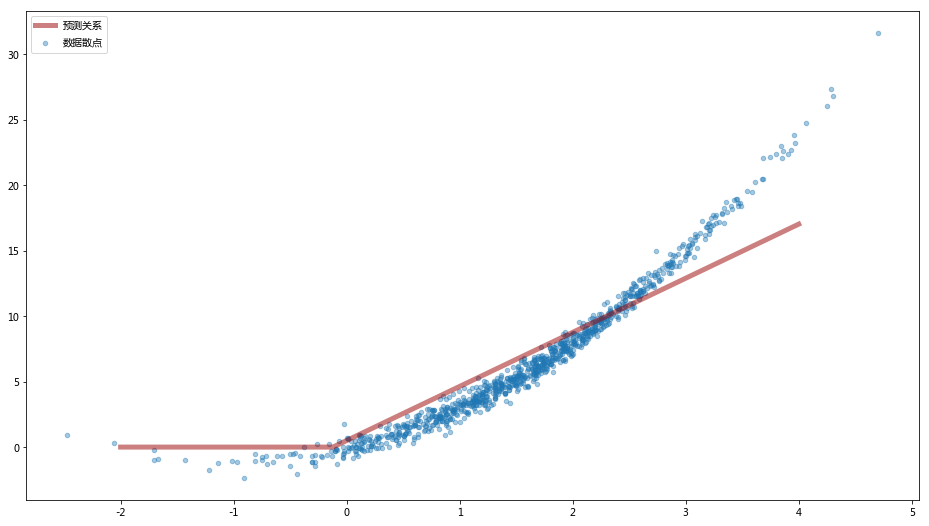

In [40]:
# 输入x
x = np.linspace(-2, 4, 100)
# 输出y
y = f_3(x, w)
# 绘图
plt.figure(figsize=(16,9))
plt.scatter(X, d, s=20, alpha=0.4, label="数据散点")
plt.plot(x, y, lw=5, color="#990000", alpha=0.5, label="预测关系")
plt.legend()
plt.show()

分析：
 - 加入非线性函数后，拟合效果基于一次函数与二次函数指尖
 - 预测曲线形状基于函数func的曲线